# Expense Analysis February 2023

## Import dependencies

In [39]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt

## Load dataset

In [40]:
df_expense = pd.read_csv('MoneyNote at 2023_08_27.csv')

## Overview

In [41]:
# First row
df_expense[:1]

,inputDate,amount(cent),memo,type,categoryId,categoryName,categoryIcon,categoryColor,categoryIndex,fixedCostSettingId,fixedCostSettingStartDate,fixedCostSettingEndDate,fixedCostSettingFrequency,fixedCostSettingLastInsertedToDailyData,dayOffOption
0,2022/12/3,1700.0,NaN,Expense,18,Social,category12,ff548f,19,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Last row
df_expense[-1:]

,inputDate,amount(cent),memo,type,categoryId,categoryName,categoryIcon,categoryColor,categoryIndex,fixedCostSettingId,fixedCostSettingStartDate,fixedCostSettingEndDate,fixedCostSettingFrequency,fixedCostSettingLastInsertedToDailyData,dayOffOption
311,NaN,NaN,NaN,Income,16,Investment,categoryDefault15,42d2c1,16,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_expense.columns

Index(['inputDate', ' amount(cent)', ' memo', ' type', ' categoryId',
       ' categoryName', ' categoryIcon', ' categoryColor', ' categoryIndex',
       ' fixedCostSettingId', ' fixedCostSettingStartDate',
       ' fixedCostSettingEndDate', ' fixedCostSettingFrequency',
       ' fixedCostSettingLastInsertedToDailyData', ' dayOffOption'],
      dtype='object')

## Create new df without unnecessary columns

In [44]:
df = df_expense[['inputDate', ' amount(cent)', ' memo', ' type', ' categoryName']].copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inputDate      310 non-null    object 
 1    amount(cent)  310 non-null    float64
 2    memo          279 non-null    object 
 3    type          312 non-null    object 
 4    categoryName  312 non-null    object 
dtypes: float64(1), object(4)
memory usage: 12.3+ KB


## Preprocessing

In [45]:
# Create a preprocessing function to transform our dataset
# Go through each column

def preprocessing(df):
    # Remove spaces from column name
    df.columns = df.columns.str.strip()
    
    # Drop rows where inputDate and amount(cent) values are missing
    df.dropna(subset=['inputDate', 'amount(cent)'], inplace=True)
    
    # Convert date from object to datetime
    df["inputDate"] = pd.to_datetime(df["inputDate"])
    
    # Create new columns for Month and Year
    df['month'] = df['inputDate'].dt.month
    df['year'] = df['inputDate'].dt.year
    
    # Create a new column for dollar
    df['amount(dollar)'] = df['amount(cent)'] / 100.00 
    
    # Drop amount(cent) column
    df.drop(columns='amount(cent)', inplace=True)
    
    # Convert memo to lower case
    df['memo'] = df['memo'].str.lower()
    # Fill missing values for memo
    df['memo'].fillna('missing', inplace=True)

preprocessing(df)

In [46]:
df.info()

# df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   inputDate       310 non-null    datetime64[ns]
 1   memo            310 non-null    object        
 2   type            310 non-null    object        
 3   categoryName    310 non-null    object        
 4   month           310 non-null    int64         
 5   year            310 non-null    int64         
 6   amount(dollar)  310 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 19.4+ KB


## Create a new dataframe for expense only

In [47]:
exp = df[df['type']=='Expense'].copy()

In [48]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 309
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   inputDate       289 non-null    datetime64[ns]
 1   memo            289 non-null    object        
 2   type            289 non-null    object        
 3   categoryName    289 non-null    object        
 4   month           289 non-null    int64         
 5   year            289 non-null    int64         
 6   amount(dollar)  289 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 18.1+ KB


In [49]:
exp.head()

,inputDate,memo,type,categoryName,month,year,amount(dollar)
0,2022-12-03,missing,Expense,Social,12,2022,17.00
1,2022-12-05,w,Expense,Food,12,2022,5.40
2,2022-12-05,uber,Expense,Transportation,12,2022,32.63
3,2022-12-03,uber home,Expense,Transportation,12,2022,27.64
4,2022-12-05,uber home from work,Expense,Transportation,12,2022,25.22


## Create new dataframe for August

In [50]:
aug = exp[exp['inputDate'].dt.month == 2].copy()

In [51]:
aug.head()

,inputDate,memo,type,categoryName,month,year,amount(dollar)
80,2023-02-02,lunch socials,Expense,Social,2,2023,18.0
81,2023-02-03,groc,Expense,Food,2,2023,29.0
82,2023-02-04,yogurt cookie,Expense,Splurge,2,2023,2.0
83,2023-02-06,g,Expense,Food,2,2023,30.0
84,2023-02-06,yogurt bis,Expense,Splurge,2,2023,2.2


### Spent by Category

In [52]:
# What is the percentage of different purchases category in this month?
categorySpent = aug.groupby('categoryName')['amount(dollar)'].sum().sort_values(ascending=False)
categorySpent

categoryName
Housing expenses    352.00
Food                193.32
Splurge              60.11
Education            35.00
Health, Medicine     22.00
Transportation       21.00
Social               18.00
Insurance            15.28
Name: amount(dollar), dtype: float64

In [53]:
# Get sum of all purchases
sumByCategory = categorySpent.sum()
sumByCategory

716.7099999999999

In [54]:
# Calculate the percentage for each category
category_percentage = (categorySpent  / sumByCategory) * 100
category_percentage

categoryName
Housing expenses    49.113309
Food                26.973253
Splurge              8.386935
Education            4.883426
Health, Medicine     3.069582
Transportation       2.930055
Social               2.511476
Insurance            2.131964
Name: amount(dollar), dtype: float64

### Pie chart visualisation

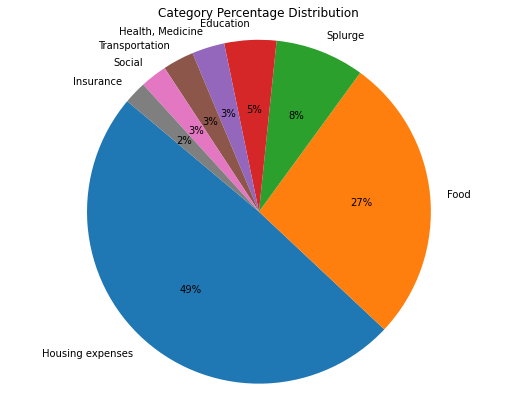

In [55]:
# Set the figure size
plt.figure(figsize=(9, 7))  
plt.pie(category_percentage, labels=category_percentage.index, autopct='%1.0f%%', startangle=140)
plt.title('Category Percentage Distribution')  # Set the chart title

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.show()

### Food

In [56]:
food = aug[aug['categoryName'] == 'Food'].copy()

In [57]:
food.head()

,inputDate,memo,type,categoryName,month,year,amount(dollar)
81,2023-02-03,groc,Expense,Food,2,2023,29.0
83,2023-02-06,g,Expense,Food,2,2023,30.0
88,2023-02-07,tortilla,Expense,Food,2,2023,2.5
90,2023-02-08,fruit,Expense,Food,2,2023,6.8
92,2023-02-10,groc,Expense,Food,2,2023,31.7


In [58]:
foodPurchases = food.groupby('memo')['amount(dollar)'].sum()
foodPurchases

memo
fruit            6.80
g               86.37
groc            94.35
orange juice     3.30
tortilla         2.50
Name: amount(dollar), dtype: float64

In [59]:
sumFoodPurchases = foodPurchases.sum()
sumFoodPurchases

193.32

In [60]:
food_pct = foodPurchases / sumFoodPurchases * 100

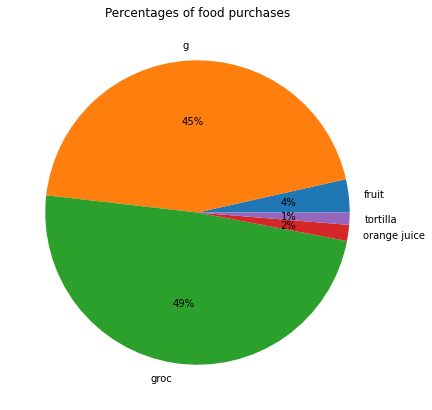

In [61]:
plt.figure(figsize=(9,7))
plt.pie(food_pct, labels=food_pct.index, autopct='%1.0f%%')
plt.title('Percentages of food purchases')
plt.show()

### Splurge 

In [62]:
splurge = aug[aug['categoryName'] == 'Splurge'].copy()

In [63]:
# First 3 records
splurge[:3]

,inputDate,memo,type,categoryName,month,year,amount(dollar)
82,2023-02-04,yogurt cookie,Expense,Splurge,2,2023,2.00
84,2023-02-06,yogurt bis,Expense,Splurge,2,2023,2.20
87,2023-02-07,yogurt ck,Expense,Splurge,2,2023,2.15


### Unhealthy snack

In [64]:
snack = aug[aug['categoryName'] == 'Unhealthy snack'].copy()

In [65]:
snack

,inputDate,memo,type,categoryName,month,year,amount(dollar)


### Social

In [66]:
social = aug[aug['categoryName'] == 'Social'].copy()
social

,inputDate,memo,type,categoryName,month,year,amount(dollar)
80,2023-02-02,lunch socials,Expense,Social,2,2023,18.0


### Health, Medicine

In [67]:
aug[aug['categoryName'] == 'Health, Medicine']

,inputDate,memo,type,categoryName,month,year,amount(dollar)
85,2023-02-07,sunscreen,Expense,"Health, Medicine",2,2023,18.0
86,2023-02-07,micellar water,Expense,"Health, Medicine",2,2023,4.0


### Oneoff expenses 

In [68]:
aug[aug['categoryName'] == 'Oneoff expenses']

,inputDate,memo,type,categoryName,month,year,amount(dollar)
